Import the needed libraries

In [31]:
import numpy as np
import pandas as pd

Read the data

In [32]:
data = pd.read_csv('test.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [33]:
data.rename(columns={'race/ethnicity': 'group','parental level of education':'parent degrees', 'test preparation course': 'test prep'}, inplace=True)

In [34]:
data

,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [35]:
data.shape

(1000, 8)

In [36]:
pass_threshold = 50

In [37]:

data['avg'] = data[['math score','writing score','reading score']].mean(axis=1) 

def calc_result(row):
   if row['math score'] < pass_threshold or row['writing score'] < pass_threshold or row['reading score'] < pass_threshold:
       return 'F'
   elif row['avg'] >= pass_threshold:
       return 'P'
   else:
       return 'F'
       
data['result'] = data.apply(calc_result, axis=1)

data.head(10)

,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score,avg,result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P
1,female,group C,some college,standard,completed,69,90,88,82.333333,P
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F
4,male,group C,some college,standard,none,76,78,75,76.333333,P
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,P
6,female,group B,some college,standard,completed,88,95,92,91.666667,P
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,P
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F


c:\Users\nhatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nhatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nhatk\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


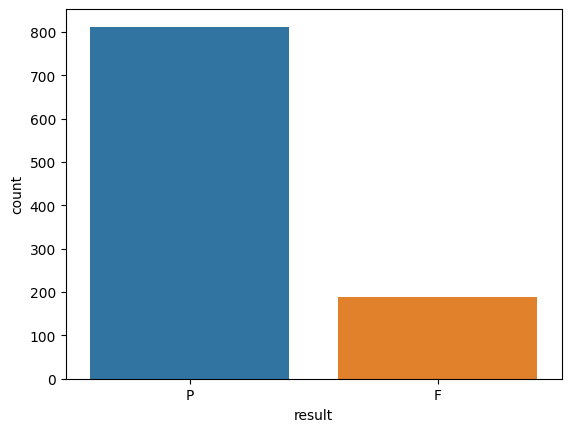

In [38]:
import seaborn as sns
sns.countplot(x='result', data=data);

In [39]:
data['result'].value_counts()

result
P    812
F    188
Name: count, dtype: int64

In [40]:

def calculate_grade(avg):
  if avg >= 90:
    return 'A+'
  elif avg >= 80:
    return 'A' 
  elif avg >= 70:
    return 'B+'
  elif avg >= 60:
    return 'B'
  elif avg >= 50:
    return 'C'
  else:
    return 'F'
data['avg'] = data[['math score','writing score','reading score']].mean(axis=1)

# Apply function to create grade column
data['grade'] = data['avg'].apply(calculate_grade)

(data.head(10))

,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score,avg,result,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B+
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A+
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,F
4,male,group C,some college,standard,none,76,78,75,76.333333,P,B+
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,P,B+
6,female,group B,some college,standard,completed,88,95,92,91.666667,P,A+
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,P,B
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F,F


In [42]:
import names

# Generate first name
data['first_name'] = data['gender'].map({'male': names.get_first_name(gender='male'),
                                     'female': names.get_first_name(gender='female')})

# Generate last name 
data['last_name'] = data.index.map(lambda x: names.get_last_name()) 

# Concat first and last name
data['name'] = data['first_name'] + ' ' + data['last_name']

,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score,avg,result,grade,first_name,last_name,name
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B+,Maria,Crier,Maria Crier
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,A,Maria,Cochran,Maria Cochran
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A+,Maria,Rodriguez,Maria Rodriguez
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,F,Richard,Babin,Richard Babin
4,male,group C,some college,standard,none,76,78,75,76.333333,P,B+,Richard,Davis,Richard Davis
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,P,B+,Maria,Law,Maria Law
6,female,group B,some college,standard,completed,88,95,92,91.666667,P,A+,Maria,Hartman,Maria Hartman
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F,F,Richard,Chavez,Richard Chavez
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,P,B,Richard,Murphy,Richard Murphy
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F,F,Maria,Navarro,Maria Navarro


In [43]:
data.head(10)

,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score,avg,result,grade,first_name,last_name,name
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B+,Maria,Crier,Maria Crier
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,A,Maria,Cochran,Maria Cochran
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A+,Maria,Rodriguez,Maria Rodriguez
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,F,Richard,Babin,Richard Babin
4,male,group C,some college,standard,none,76,78,75,76.333333,P,B+,Richard,Davis,Richard Davis
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,P,B+,Maria,Law,Maria Law
6,female,group B,some college,standard,completed,88,95,92,91.666667,P,A+,Maria,Hartman,Maria Hartman
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F,F,Richard,Chavez,Richard Chavez
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,P,B,Richard,Murphy,Richard Murphy
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F,F,Maria,Navarro,Maria Navarro


In [46]:
data = data.drop(['last_name', 'first_name'], axis=1)


In [47]:
data.head(10)

,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score,avg,result,grade,name
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B+,Maria Crier
1,female,group C,some college,standard,completed,69,90,88,82.333333,P,A,Maria Cochran
2,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A+,Maria Rodriguez
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,F,Richard Babin
4,male,group C,some college,standard,none,76,78,75,76.333333,P,B+,Richard Davis
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,P,B+,Maria Law
6,female,group B,some college,standard,completed,88,95,92,91.666667,P,A+,Maria Hartman
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F,F,Richard Chavez
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,P,B,Richard Murphy
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,F,F,Maria Navarro


In [48]:
name_col = data.pop('name')
data.insert(0, 'name', name_col)


In [50]:
data.index = data.index + 1


In [51]:
data

,name,gender,group,parent degrees,lunch,test prep,math score,reading score,writing score,avg,result,grade
1,Maria Crier,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,P,B+
2,Maria Cochran,female,group C,some college,standard,completed,69,90,88,82.333333,P,A
3,Maria Rodriguez,female,group B,master's degree,standard,none,90,95,93,92.666667,P,A+
4,Richard Babin,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,F
5,Richard Davis,male,group C,some college,standard,none,76,78,75,76.333333,P,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
996,Maria Wilson,female,group E,master's degree,standard,completed,88,99,95,94.000000,P,A+
997,Richard Lawson,male,group C,high school,free/reduced,none,62,55,55,57.333333,P,C
998,Maria Newman,female,group C,high school,free/reduced,completed,59,71,65,65.000000,P,B
999,Maria Wilson,female,group D,some college,standard,completed,68,78,77,74.333333,P,B+


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   gender          1000 non-null   object 
 2   group           1000 non-null   object 
 3   parent degrees  1000 non-null   object 
 4   lunch           1000 non-null   object 
 5   test prep       1000 non-null   object 
 6   math score      1000 non-null   int64  
 7   reading score   1000 non-null   int64  
 8   writing score   1000 non-null   int64  
 9   avg             1000 non-null   float64
 10  result          1000 non-null   object 
 11  grade           1000 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 93.9+ KB


In [52]:
data.to_csv('new_data.csv', index=False)